In [1]:
import os, sys
sys.path.append('../../src')

import json
from datetime import datetime
import pandas as pd

import visualization.visualize as vis
from data.load_dataset import load_dataset
from models.train_model import get_dataloaders, set_and_train_model
from models.model import get_model, evaluate_model, save_model

## Running all databases and rounds

In [2]:
num_epochs = 30
base_path = '../../models/local_models/'

../../models/local_models/2022-11-18_0h9m46s/ folder created.


Training round_number 1 site_number 1:
train_set size: 5576
valid_set size: 1634
test_set size: 4260
total: 11470

File Not Found: ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-0_site-1.pth.
Model will start with default initialization.
Cuda available: True. Model sent to device: cuda:0.

Epoch 0/29
----------
train Loss: 0.6491 Acc: 0.6341
valid Loss: 0.6380 Acc: 0.6395
3m 58s/epoch

Epoch 1/29
----------
train Loss: 0.6106 Acc: 0.6729
valid Loss: 0.6231 Acc: 0.6610
3m 21s/epoch

Epoch 2/29
----------
train Loss: 0.5885 Acc: 0.6980
valid Loss: 0.6366 Acc: 0.6548
3m 16s/epoch

Epoch 3/29
----------
train Loss: 0.5612 Acc: 0.7086
valid Loss: 0.6243 Acc: 0.6922
3m 20s/epoch

Epoch 4/29
----------
train Loss: 0.5292 Acc: 0.7373
valid Loss: 0.6675 Acc: 0.6573
3m 16s/epoch

Epoch 5/29
----------
train Loss: 0.4907 Acc: 0.7618
valid Loss: 0.7073 Acc: 0.6401
3m 15s/epoch

Epoch 6/29
----------


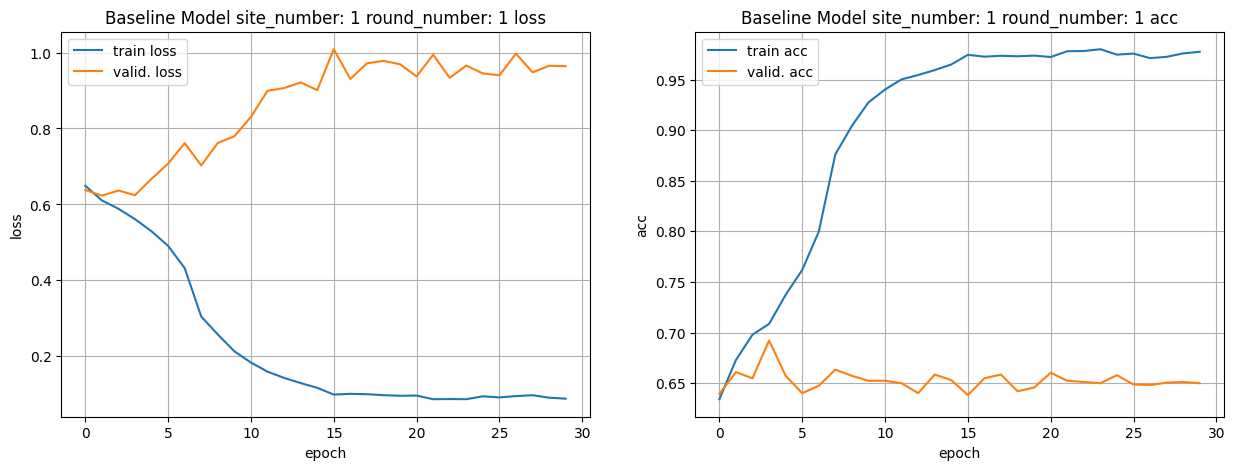


Classification report for test set:
              precision    recall  f1-score   support

         0.0       0.69      0.72      0.70      2333
         1.0       0.64      0.62      0.63      1927

    accuracy                           0.67      4260
   macro avg       0.67      0.67      0.67      4260
weighted avg       0.67      0.67      0.67      4260

2022-11-18_0h9m46s_local_model_round-1_site-1 saved at ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-1_site-1.pth


Training round_number 1 site_number 2:
train_set size: 5262
valid_set size: 1850
test_set size: 4586
total: 11698

File Not Found: ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-0_site-2.pth.
Model will start with default initialization.
Cuda available: True. Model sent to device: cuda:0.

Epoch 0/29
----------
train Loss: 0.6559 Acc: 0.6239
valid Loss: 0.6245 Acc: 0.6627
3m 35s/epoch

Epoch 1/29
----------
train Loss: 0.6079 Acc: 0.6756
valid L

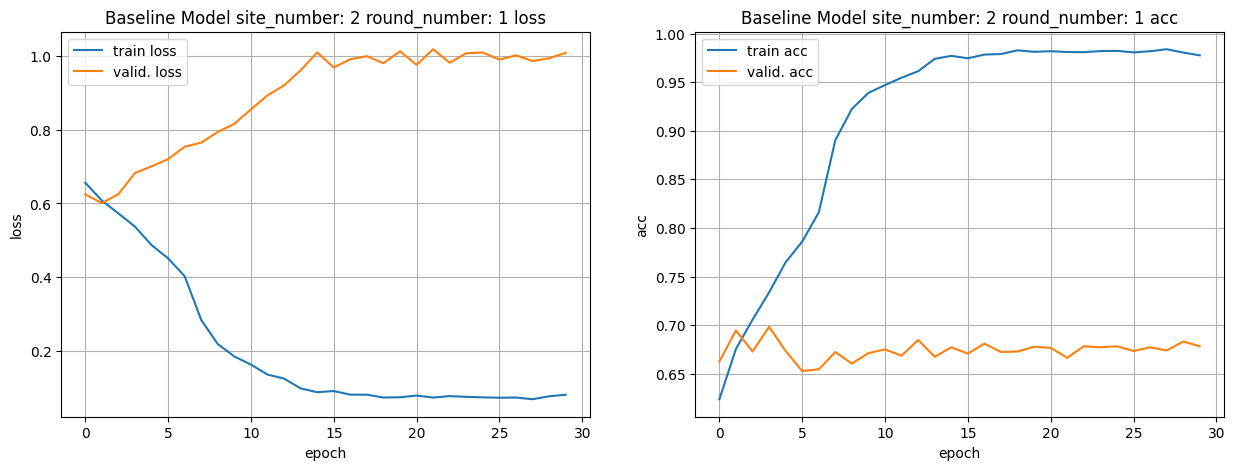


Classification report for test set:
              precision    recall  f1-score   support

         0.0       0.65      0.80      0.72      2436
         1.0       0.69      0.52      0.60      2150

    accuracy                           0.67      4586
   macro avg       0.67      0.66      0.66      4586
weighted avg       0.67      0.67      0.66      4586

2022-11-18_0h9m46s_local_model_round-1_site-2 saved at ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-1_site-2.pth


Training round_number 1 site_number 3:
train_set size: 5450
valid_set size: 1828
test_set size: 4473
total: 11751

File Not Found: ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-0_site-3.pth.
Model will start with default initialization.
Cuda available: True. Model sent to device: cuda:0.

Epoch 0/29
----------
train Loss: 0.6348 Acc: 0.6516
valid Loss: 0.6301 Acc: 0.6696
3m 51s/epoch

Epoch 1/29
----------
train Loss: 0.6003 Acc: 0.6853
valid L

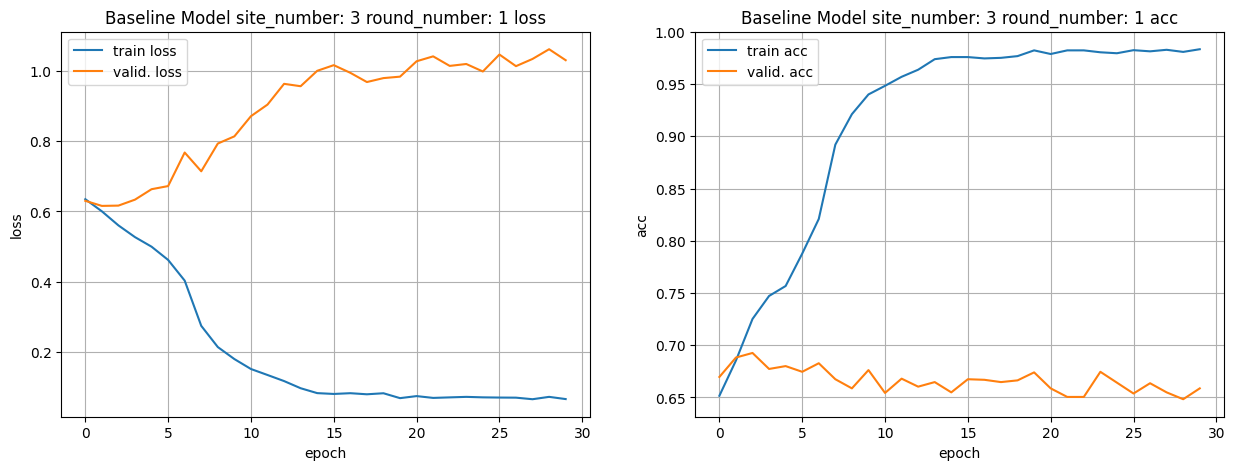


Classification report for test set:
              precision    recall  f1-score   support

         0.0       0.70      0.70      0.70      2381
         1.0       0.66      0.65      0.66      2092

    accuracy                           0.68      4473
   macro avg       0.68      0.68      0.68      4473
weighted avg       0.68      0.68      0.68      4473

2022-11-18_0h9m46s_local_model_round-1_site-3 saved at ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-1_site-3.pth


Training round_number 1 site_number 4:
train_set size: 5487
valid_set size: 1621
test_set size: 4201
total: 11309

File Not Found: ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-0_site-4.pth.
Model will start with default initialization.
Cuda available: True. Model sent to device: cuda:0.

Epoch 0/29
----------
train Loss: 0.6616 Acc: 0.6247
valid Loss: 0.6470 Acc: 0.6305
3m 39s/epoch

Epoch 1/29
----------
train Loss: 0.6195 Acc: 0.6743
valid L

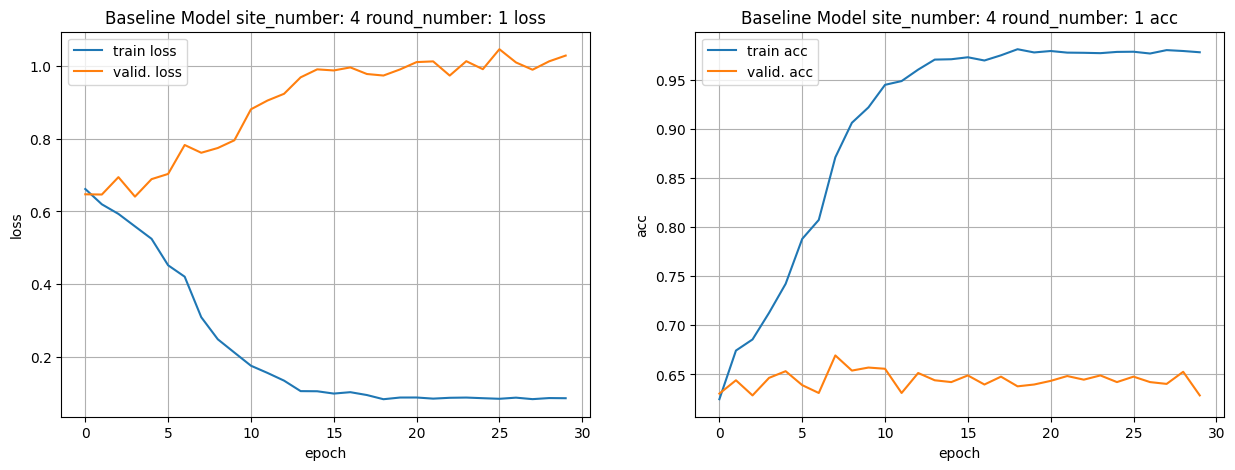


Classification report for test set:
              precision    recall  f1-score   support

         0.0       0.64      0.75      0.69      2214
         1.0       0.66      0.53      0.59      1987

    accuracy                           0.65      4201
   macro avg       0.65      0.64      0.64      4201
weighted avg       0.65      0.65      0.64      4201

2022-11-18_0h9m46s_local_model_round-1_site-4 saved at ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-1_site-4.pth


Training round_number 1 site_number 5:
train_set size: 5464
valid_set size: 1634
test_set size: 4998
total: 12096

File Not Found: ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-0_site-5.pth.
Model will start with default initialization.
Cuda available: True. Model sent to device: cuda:0.

Epoch 0/29
----------
train Loss: 0.6416 Acc: 0.6340
valid Loss: 0.6337 Acc: 0.6665
3m 44s/epoch

Epoch 1/29
----------
train Loss: 0.5987 Acc: 0.6843
valid L

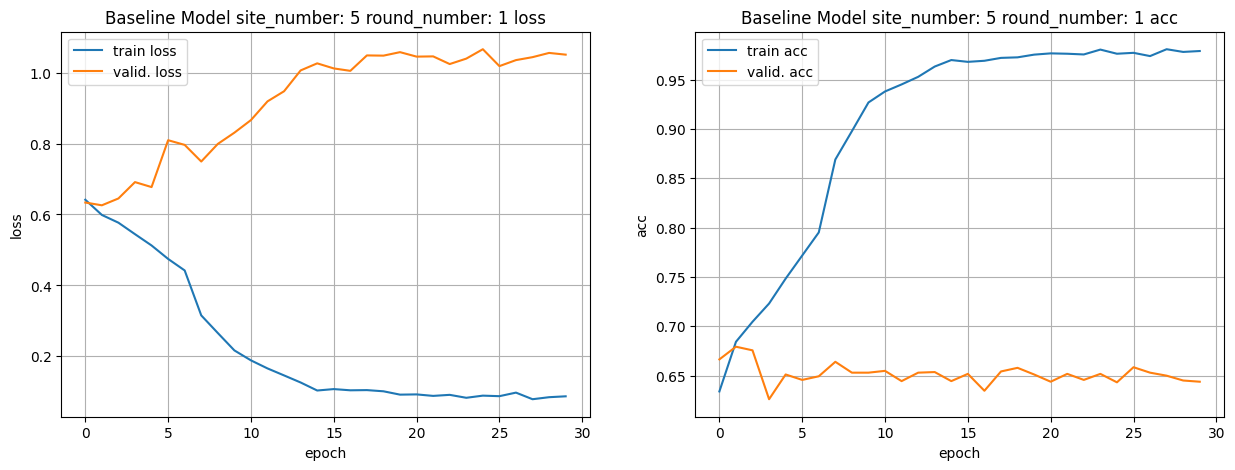


Classification report for test set:
              precision    recall  f1-score   support

         0.0       0.69      0.72      0.70      2647
         1.0       0.67      0.63      0.65      2351

    accuracy                           0.68      4998
   macro avg       0.68      0.68      0.68      4998
weighted avg       0.68      0.68      0.68      4998

2022-11-18_0h9m46s_local_model_round-1_site-5 saved at ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-1_site-5.pth


Training round_number 2 site_number 1:
train_set size: 7687
valid_set size: 2237
test_set size: 4260
total: 14184

2022-11-18_0h9m46s_local_model_round-1_site-1.pth loaded successfully.
Cuda available: True. Model sent to device: cuda:0.

Epoch 0/29
----------
train Loss: 0.5653 Acc: 0.7141
valid Loss: 0.6872 Acc: 0.6513
5m 3s/epoch

Epoch 1/29
----------
train Loss: 0.5210 Acc: 0.7416
valid Loss: 0.6989 Acc: 0.6670
4m 41s/epoch

Epoch 2/29
----------
train Loss: 0.4897 Acc: 0.75

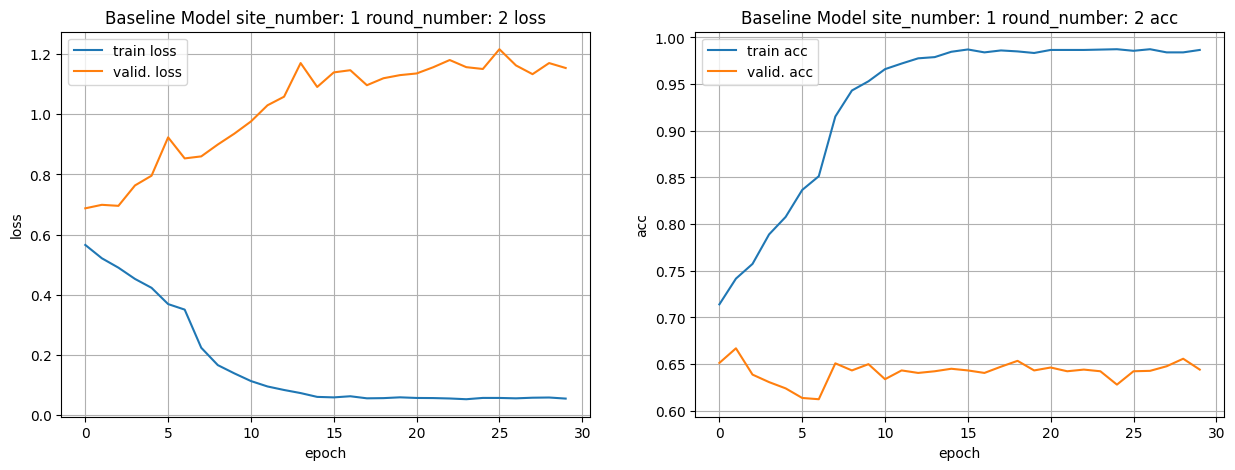


Classification report for test set:
              precision    recall  f1-score   support

         0.0       0.68      0.74      0.71      2333
         1.0       0.65      0.58      0.62      1927

    accuracy                           0.67      4260
   macro avg       0.67      0.66      0.66      4260
weighted avg       0.67      0.67      0.67      4260

2022-11-18_0h9m46s_local_model_round-2_site-1 saved at ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-2_site-1.pth


Training round_number 2 site_number 2:
train_set size: 7213
valid_set size: 2531
test_set size: 4586
total: 14330

2022-11-18_0h9m46s_local_model_round-1_site-2.pth loaded successfully.
Cuda available: True. Model sent to device: cuda:0.

Epoch 0/29
----------
train Loss: 0.5425 Acc: 0.7313
valid Loss: 0.6384 Acc: 0.6697
4m 60s/epoch

Epoch 1/29
----------
train Loss: 0.5070 Acc: 0.7563
valid Loss: 0.6915 Acc: 0.6247
4m 40s/epoch

Epoch 2/29
----------
train Loss: 0.4660 Acc: 0.7

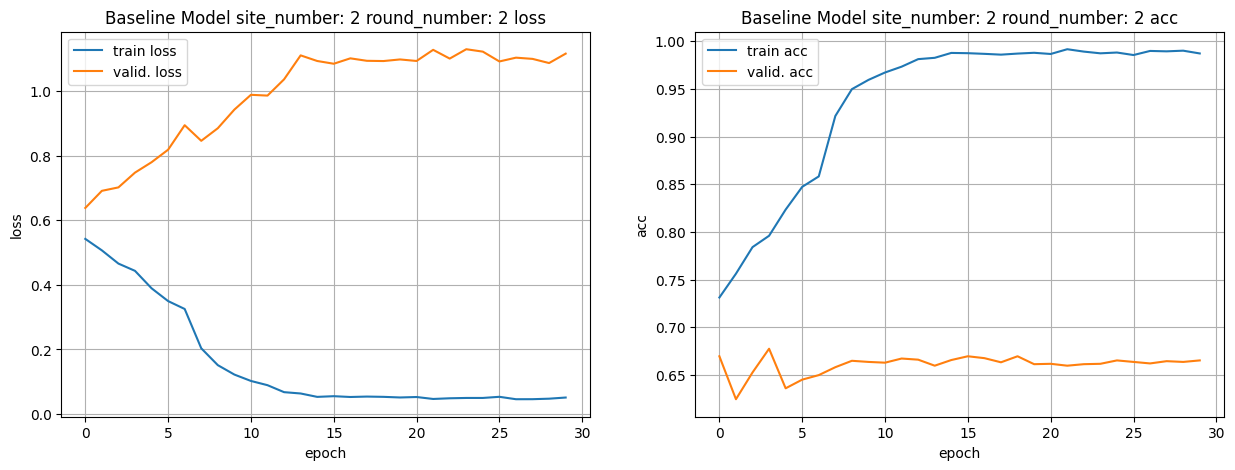


Classification report for test set:
              precision    recall  f1-score   support

         0.0       0.68      0.71      0.70      2436
         1.0       0.66      0.62      0.64      2150

    accuracy                           0.67      4586
   macro avg       0.67      0.67      0.67      4586
weighted avg       0.67      0.67      0.67      4586

2022-11-18_0h9m46s_local_model_round-2_site-2 saved at ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-2_site-2.pth


Training round_number 2 site_number 3:
train_set size: 7470
valid_set size: 2503
test_set size: 4473
total: 14446

2022-11-18_0h9m46s_local_model_round-1_site-3.pth loaded successfully.
Cuda available: True. Model sent to device: cuda:0.

Epoch 0/29
----------
train Loss: 0.5565 Acc: 0.7257
valid Loss: 0.6255 Acc: 0.6796
5m 16s/epoch

Epoch 1/29
----------
train Loss: 0.5241 Acc: 0.7522
valid Loss: 0.6691 Acc: 0.6372
4m 40s/epoch

Epoch 2/29
----------
train Loss: 0.4927 Acc: 0.7

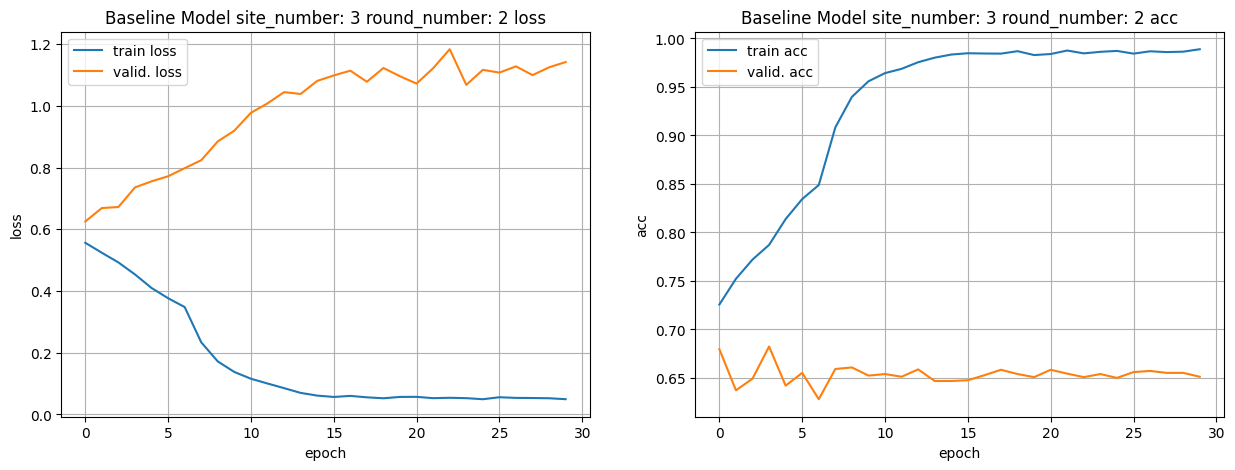


Classification report for test set:
              precision    recall  f1-score   support

         0.0       0.67      0.73      0.70      2381
         1.0       0.66      0.60      0.63      2092

    accuracy                           0.67      4473
   macro avg       0.67      0.66      0.66      4473
weighted avg       0.67      0.67      0.67      4473

2022-11-18_0h9m46s_local_model_round-2_site-3 saved at ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-2_site-3.pth


Training round_number 2 site_number 4:
train_set size: 7570
valid_set size: 2246
test_set size: 4201
total: 14017

2022-11-18_0h9m46s_local_model_round-1_site-4.pth loaded successfully.
Cuda available: True. Model sent to device: cuda:0.

Epoch 0/29
----------
train Loss: 0.5187 Acc: 0.7547
valid Loss: 0.7260 Acc: 0.6118
5m 38s/epoch

Epoch 1/29
----------
train Loss: 0.4429 Acc: 0.7967
valid Loss: 0.7374 Acc: 0.6438
4m 42s/epoch

Epoch 2/29
----------
train Loss: 0.3914 Acc: 0.8

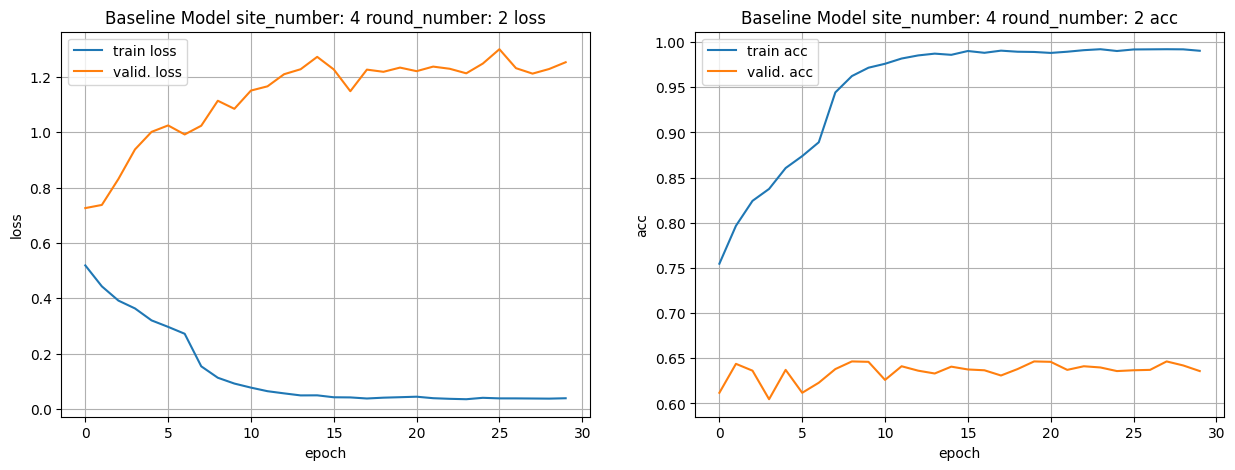


Classification report for test set:
              precision    recall  f1-score   support

         0.0       0.64      0.77      0.70      2214
         1.0       0.67      0.51      0.58      1987

    accuracy                           0.65      4201
   macro avg       0.65      0.64      0.64      4201
weighted avg       0.65      0.65      0.64      4201

2022-11-18_0h9m46s_local_model_round-2_site-4 saved at ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-2_site-4.pth


Training round_number 2 site_number 5:
train_set size: 7519
valid_set size: 2276
test_set size: 4998
total: 14793

2022-11-18_0h9m46s_local_model_round-1_site-5.pth loaded successfully.
Cuda available: True. Model sent to device: cuda:0.

Epoch 0/29
----------
train Loss: 0.5982 Acc: 0.6988
valid Loss: 0.6208 Acc: 0.6705
6m 10s/epoch

Epoch 1/29
----------
train Loss: 0.5724 Acc: 0.7049
valid Loss: 0.6497 Acc: 0.6718
4m 47s/epoch

Epoch 2/29
----------
train Loss: 0.5409 Acc: 0.7

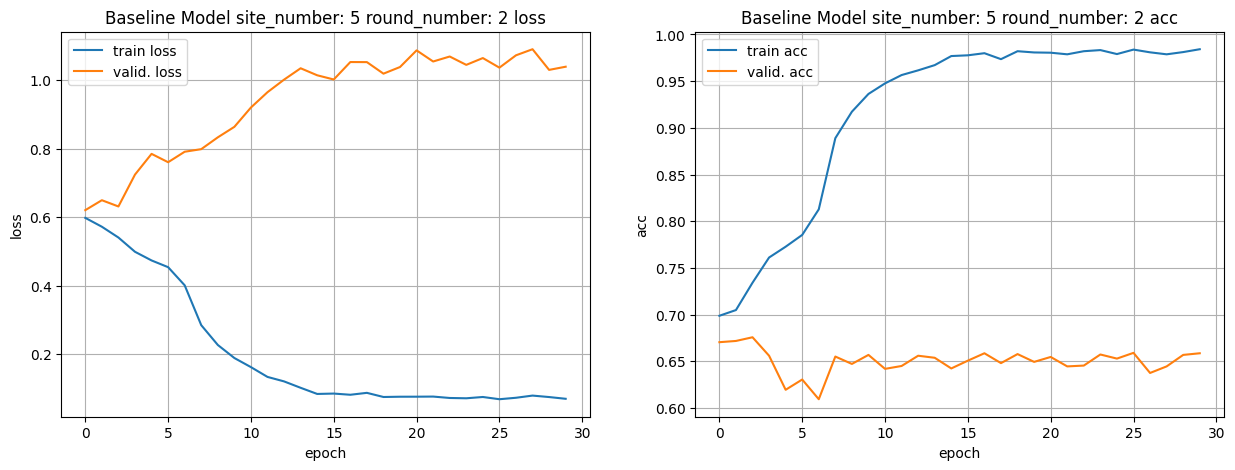


Classification report for test set:
              precision    recall  f1-score   support

         0.0       0.68      0.74      0.71      2647
         1.0       0.67      0.61      0.64      2351

    accuracy                           0.68      4998
   macro avg       0.68      0.67      0.67      4998
weighted avg       0.68      0.68      0.68      4998

2022-11-18_0h9m46s_local_model_round-2_site-5 saved at ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-2_site-5.pth


Training round_number 3 site_number 1:
train_set size: 9783
valid_set size: 2865
test_set size: 4260
total: 16908

2022-11-18_0h9m46s_local_model_round-2_site-1.pth loaded successfully.
Cuda available: True. Model sent to device: cuda:0.

Epoch 0/29
----------
train Loss: 0.5454 Acc: 0.7300
valid Loss: 0.7418 Acc: 0.5843
6m 26s/epoch

Epoch 1/29
----------
train Loss: 0.5058 Acc: 0.7571
valid Loss: 0.6682 Acc: 0.6639
5m 46s/epoch

Epoch 2/29
----------
train Loss: 0.4705 Acc: 0.7

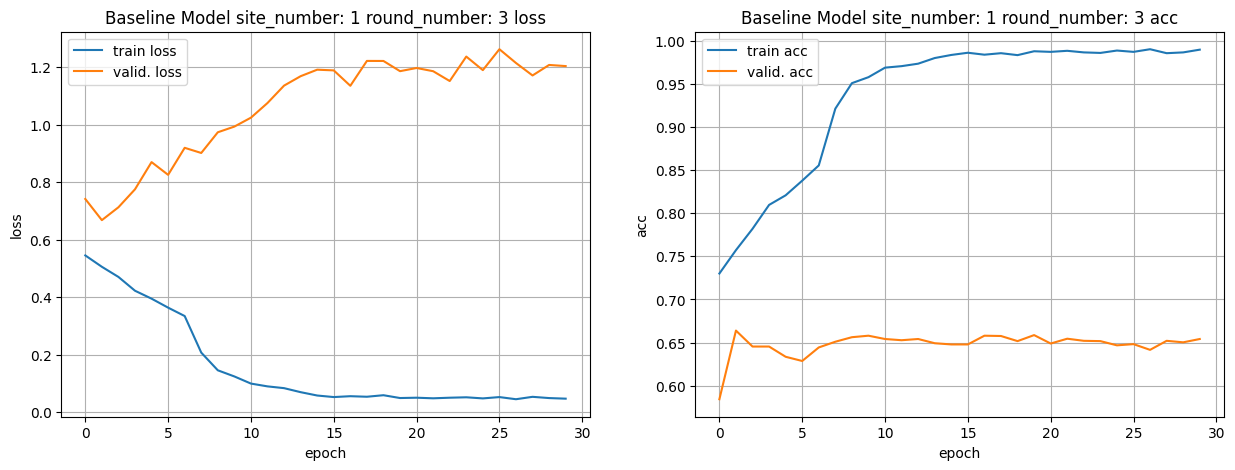


Classification report for test set:
              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70      2333
         1.0       0.64      0.62      0.63      1927

    accuracy                           0.67      4260
   macro avg       0.66      0.66      0.66      4260
weighted avg       0.67      0.67      0.67      4260

2022-11-18_0h9m46s_local_model_round-3_site-1 saved at ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-3_site-1.pth


Training round_number 3 site_number 2:
train_set size: 9270
valid_set size: 3200
test_set size: 4586
total: 17056

2022-11-18_0h9m46s_local_model_round-2_site-2.pth loaded successfully.
Cuda available: True. Model sent to device: cuda:0.

Epoch 0/29
----------
train Loss: 0.4748 Acc: 0.7780
valid Loss: 0.7411 Acc: 0.6144
6m 20s/epoch

Epoch 1/29
----------
train Loss: 0.4285 Acc: 0.7971
valid Loss: 0.7433 Acc: 0.6625
5m 43s/epoch

Epoch 2/29
----------
train Loss: 0.3928 Acc: 0.8

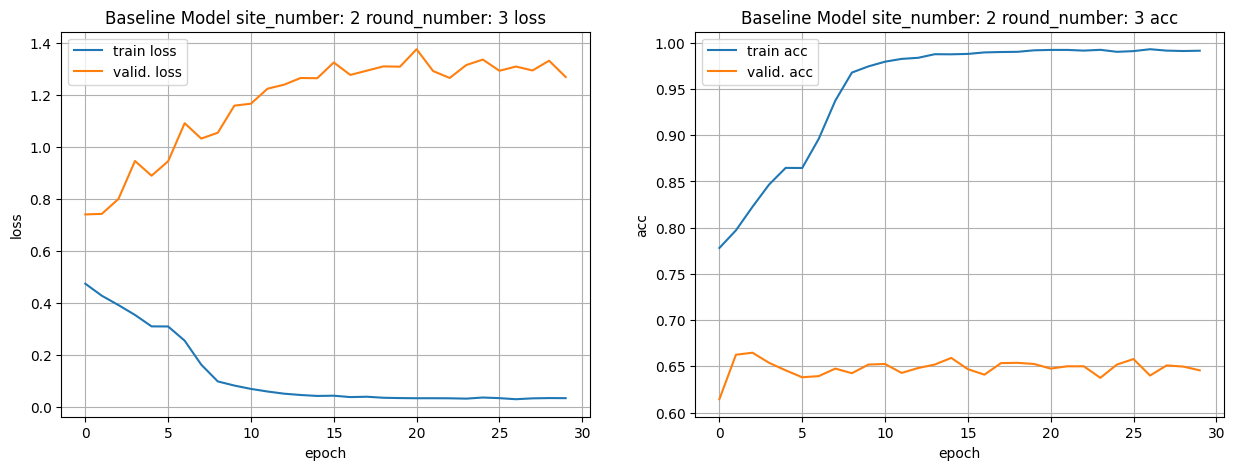


Classification report for test set:
              precision    recall  f1-score   support

         0.0       0.68      0.69      0.68      2436
         1.0       0.64      0.63      0.63      2150

    accuracy                           0.66      4586
   macro avg       0.66      0.66      0.66      4586
weighted avg       0.66      0.66      0.66      4586

2022-11-18_0h9m46s_local_model_round-3_site-2 saved at ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-3_site-2.pth


Training round_number 3 site_number 3:
train_set size: 9518
valid_set size: 3205
test_set size: 4473
total: 17196

2022-11-18_0h9m46s_local_model_round-2_site-3.pth loaded successfully.
Cuda available: True. Model sent to device: cuda:0.

Epoch 0/29
----------
train Loss: 0.4992 Acc: 0.7638
valid Loss: 0.7087 Acc: 0.6755
6m 38s/epoch

Epoch 1/29
----------
train Loss: 0.4408 Acc: 0.7989
valid Loss: 0.7490 Acc: 0.6437
5m 45s/epoch

Epoch 2/29
----------
train Loss: 0.4067 Acc: 0.8

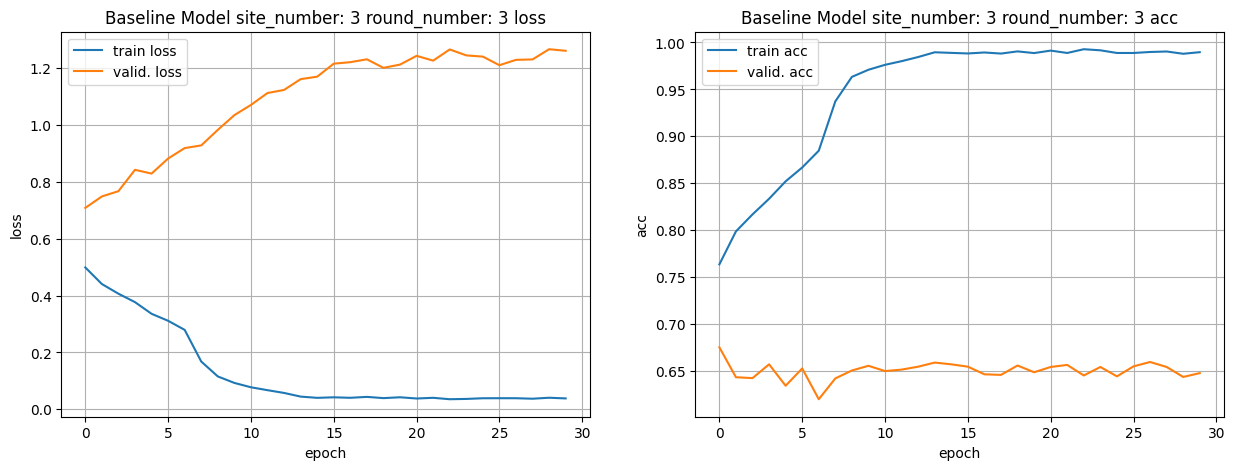


Classification report for test set:
              precision    recall  f1-score   support

         0.0       0.69      0.69      0.69      2381
         1.0       0.65      0.65      0.65      2092

    accuracy                           0.67      4473
   macro avg       0.67      0.67      0.67      4473
weighted avg       0.67      0.67      0.67      4473

2022-11-18_0h9m46s_local_model_round-3_site-3 saved at ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-3_site-3.pth


Training round_number 3 site_number 4:
train_set size: 9619
valid_set size: 2853
test_set size: 4201
total: 16673

2022-11-18_0h9m46s_local_model_round-2_site-4.pth loaded successfully.
Cuda available: True. Model sent to device: cuda:0.

Epoch 0/29
----------
train Loss: 0.4094 Acc: 0.8259
valid Loss: 1.0027 Acc: 0.6260
6m 29s/epoch

Epoch 1/29
----------
train Loss: 0.3174 Acc: 0.8669
valid Loss: 0.9207 Acc: 0.6029
5m 40s/epoch

Epoch 2/29
----------
train Loss: 0.2542 Acc: 0.8

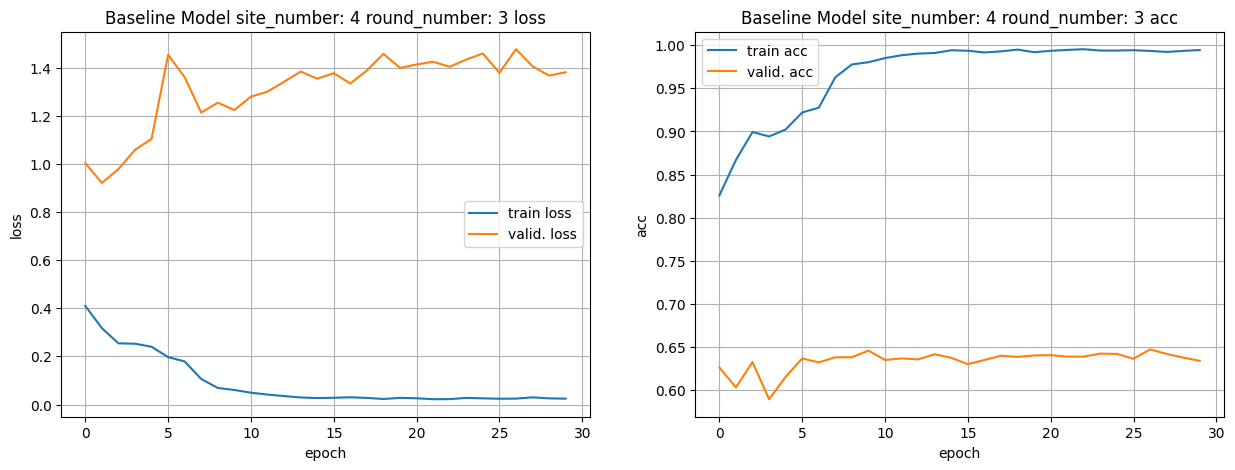


Classification report for test set:
              precision    recall  f1-score   support

         0.0       0.65      0.73      0.69      2214
         1.0       0.65      0.57      0.61      1987

    accuracy                           0.65      4201
   macro avg       0.65      0.65      0.65      4201
weighted avg       0.65      0.65      0.65      4201

2022-11-18_0h9m46s_local_model_round-3_site-4 saved at ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-3_site-4.pth


Training round_number 3 site_number 5:
train_set size: 9601
valid_set size: 2919
test_set size: 4998
total: 17518

2022-11-18_0h9m46s_local_model_round-2_site-5.pth loaded successfully.
Cuda available: True. Model sent to device: cuda:0.

Epoch 0/29
----------
train Loss: 0.5600 Acc: 0.7208
valid Loss: 0.7706 Acc: 0.5793
6m 19s/epoch

Epoch 1/29
----------
train Loss: 0.5283 Acc: 0.7417
valid Loss: 0.7112 Acc: 0.6389
5m 32s/epoch

Epoch 2/29
----------
train Loss: 0.4892 Acc: 0.7

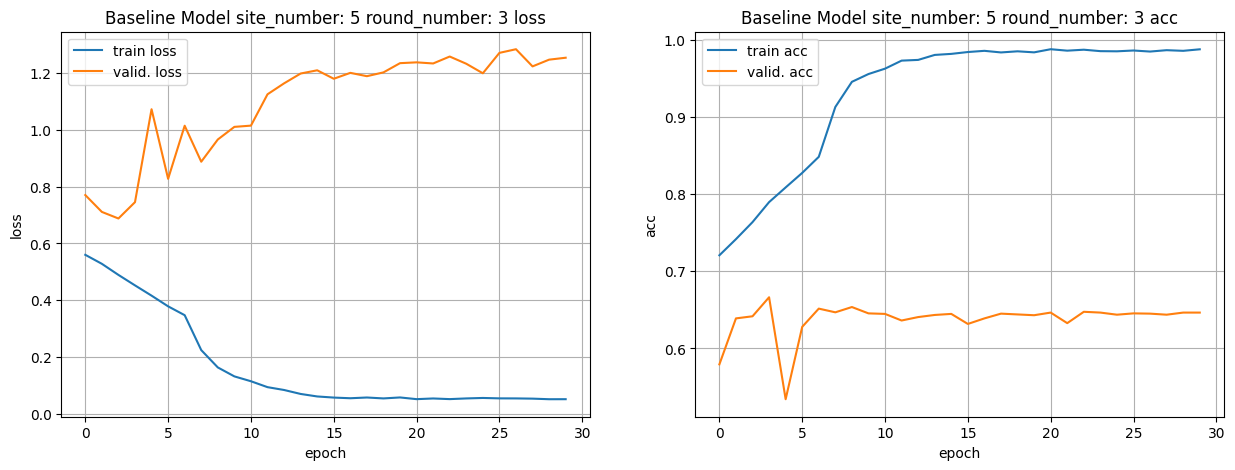


Classification report for test set:
              precision    recall  f1-score   support

         0.0       0.67      0.72      0.70      2647
         1.0       0.66      0.59      0.62      2351

    accuracy                           0.66      4998
   macro avg       0.66      0.66      0.66      4998
weighted avg       0.66      0.66      0.66      4998

2022-11-18_0h9m46s_local_model_round-3_site-5 saved at ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-3_site-5.pth


Training round_number 4 site_number 1:
train_set size: 11821
valid_set size: 3492
test_set size: 4260
total: 19573

2022-11-18_0h9m46s_local_model_round-3_site-1.pth loaded successfully.
Cuda available: True. Model sent to device: cuda:0.

Epoch 0/29
----------
train Loss: 0.5085 Acc: 0.7496
valid Loss: 0.6641 Acc: 0.6670
7m 58s/epoch

Epoch 1/29
----------
train Loss: 0.4640 Acc: 0.7843
valid Loss: 0.7201 Acc: 0.6618
7m 32s/epoch

Epoch 2/29
----------
train Loss: 0.4364 Acc: 0.

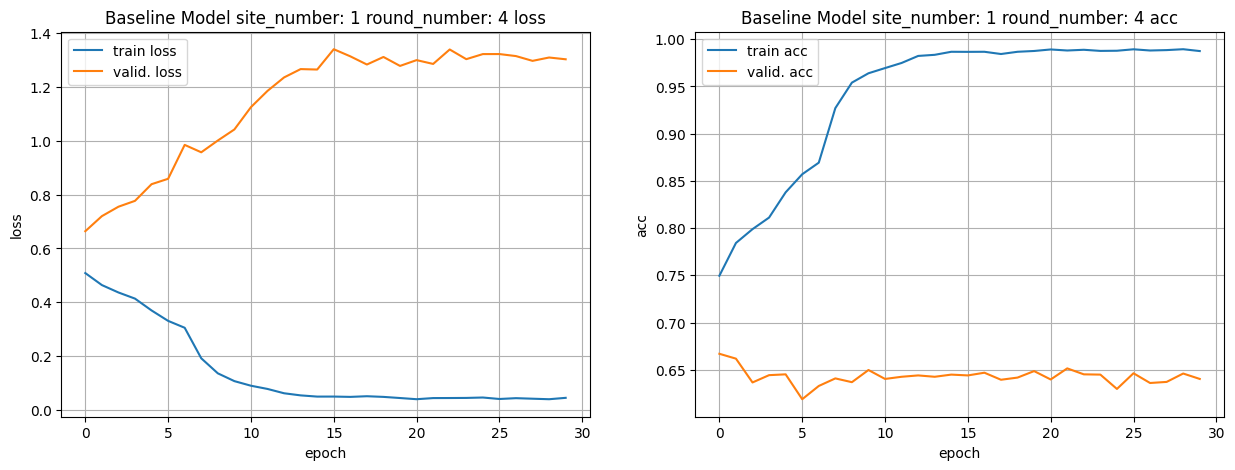


Classification report for test set:
              precision    recall  f1-score   support

         0.0       0.68      0.76      0.72      2333
         1.0       0.66      0.56      0.60      1927

    accuracy                           0.67      4260
   macro avg       0.67      0.66      0.66      4260
weighted avg       0.67      0.67      0.67      4260

2022-11-18_0h9m46s_local_model_round-4_site-1 saved at ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-4_site-1.pth


Training round_number 4 site_number 2:
train_set size: 11204
valid_set size: 3868
test_set size: 4586
total: 19658

2022-11-18_0h9m46s_local_model_round-3_site-2.pth loaded successfully.
Cuda available: True. Model sent to device: cuda:0.

Epoch 0/29
----------
train Loss: 0.4511 Acc: 0.7984
valid Loss: 0.7534 Acc: 0.6409
7m 46s/epoch

Epoch 1/29
----------
train Loss: 0.3813 Acc: 0.8299
valid Loss: 0.7716 Acc: 0.6396
6m 56s/epoch

Epoch 2/29
----------
train Loss: 0.3513 Acc: 0.

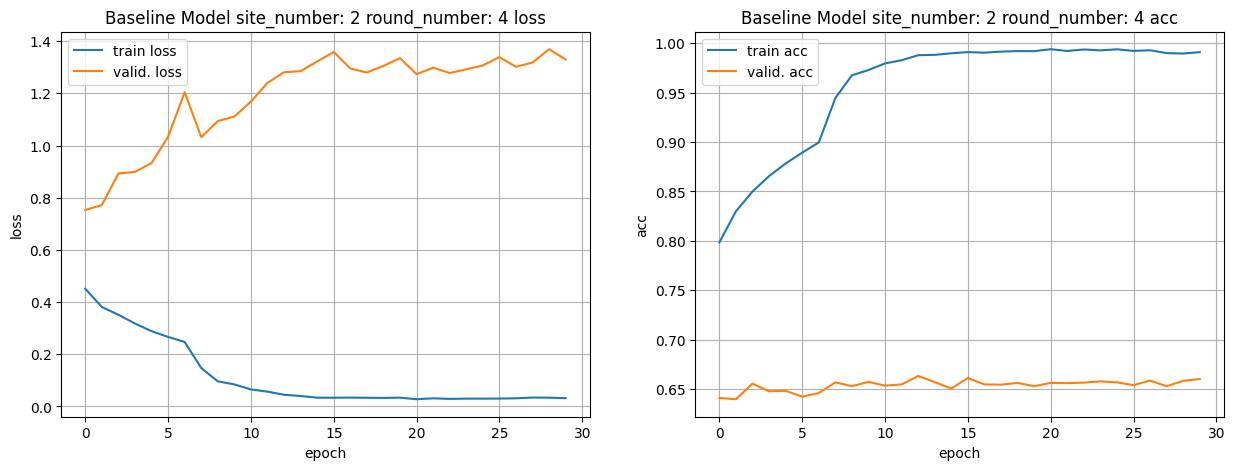


Classification report for test set:
              precision    recall  f1-score   support

         0.0       0.67      0.69      0.68      2436
         1.0       0.63      0.62      0.63      2150

    accuracy                           0.65      4586
   macro avg       0.65      0.65      0.65      4586
weighted avg       0.65      0.65      0.65      4586

2022-11-18_0h9m46s_local_model_round-4_site-2 saved at ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-4_site-2.pth


Training round_number 4 site_number 3:
train_set size: 11555
valid_set size: 3931
test_set size: 4473
total: 19959

2022-11-18_0h9m46s_local_model_round-3_site-3.pth loaded successfully.
Cuda available: True. Model sent to device: cuda:0.

Epoch 0/29
----------
train Loss: 0.4927 Acc: 0.7653
valid Loss: 0.6854 Acc: 0.6731
8m 8s/epoch

Epoch 1/29
----------
train Loss: 0.4634 Acc: 0.7865
valid Loss: 0.7852 Acc: 0.6474
7m 9s/epoch

Epoch 2/29
----------
train Loss: 0.4328 Acc: 0.80

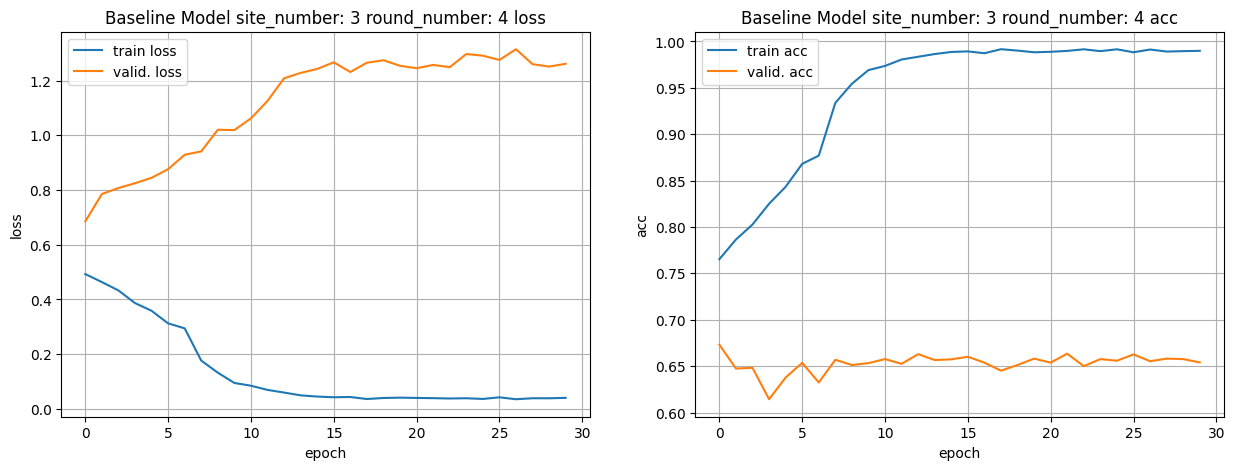


Classification report for test set:
              precision    recall  f1-score   support

         0.0       0.72      0.58      0.65      2381
         1.0       0.61      0.75      0.67      2092

    accuracy                           0.66      4473
   macro avg       0.67      0.67      0.66      4473
weighted avg       0.67      0.66      0.66      4473

2022-11-18_0h9m46s_local_model_round-4_site-3 saved at ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-4_site-3.pth


Training round_number 4 site_number 4:
train_set size: 11678
valid_set size: 3481
test_set size: 4201
total: 19360

2022-11-18_0h9m46s_local_model_round-3_site-4.pth loaded successfully.
Cuda available: True. Model sent to device: cuda:0.

Epoch 0/29
----------
train Loss: 0.3497 Acc: 0.8685
valid Loss: 0.8733 Acc: 0.6268
7m 41s/epoch

Epoch 1/29
----------
train Loss: 0.2353 Acc: 0.9072
valid Loss: 1.0642 Acc: 0.6432
6m 44s/epoch

Epoch 2/29
----------
train Loss: 0.2032 Acc: 0.

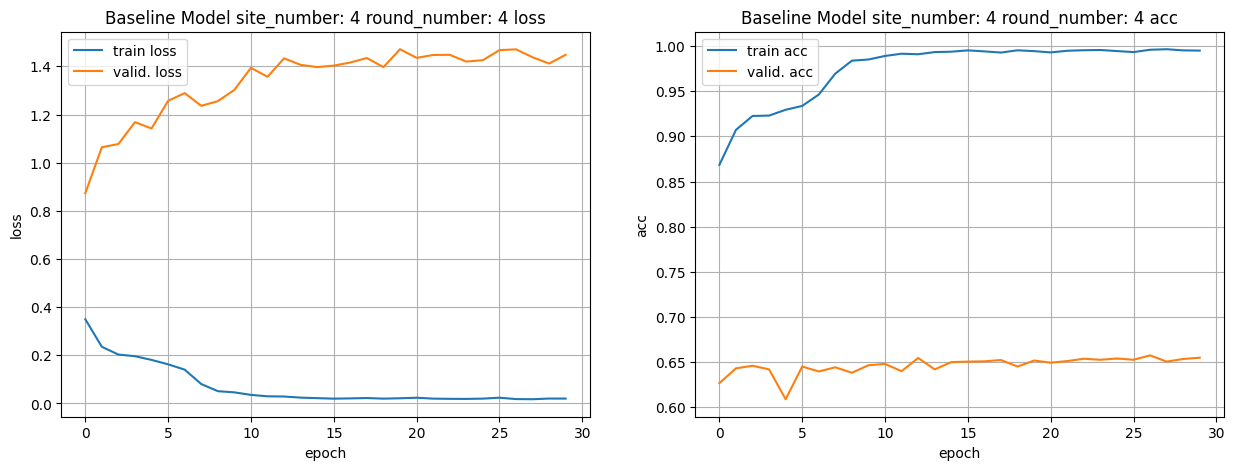


Classification report for test set:
              precision    recall  f1-score   support

         0.0       0.65      0.74      0.69      2214
         1.0       0.66      0.56      0.61      1987

    accuracy                           0.66      4201
   macro avg       0.66      0.65      0.65      4201
weighted avg       0.66      0.66      0.65      4201

2022-11-18_0h9m46s_local_model_round-4_site-4 saved at ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-4_site-4.pth


Training round_number 4 site_number 5:
train_set size: 11696
valid_set size: 3530
test_set size: 4998
total: 20224

2022-11-18_0h9m46s_local_model_round-3_site-5.pth loaded successfully.
Cuda available: True. Model sent to device: cuda:0.

Epoch 0/29
----------
train Loss: 0.4917 Acc: 0.7653
valid Loss: 0.7254 Acc: 0.6365
7m 40s/epoch

Epoch 1/29
----------
train Loss: 0.4450 Acc: 0.7940
valid Loss: 0.7755 Acc: 0.6252
6m 46s/epoch

Epoch 2/29
----------
train Loss: 0.3956 Acc: 0.

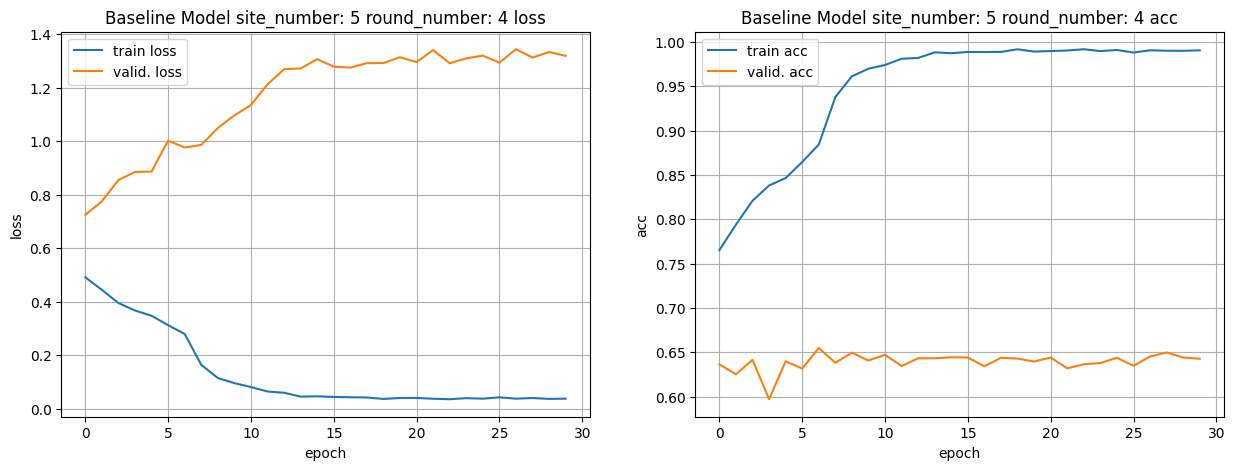


Classification report for test set:
              precision    recall  f1-score   support

         0.0       0.67      0.71      0.69      2647
         1.0       0.65      0.60      0.62      2351

    accuracy                           0.66      4998
   macro avg       0.66      0.65      0.66      4998
weighted avg       0.66      0.66      0.66      4998

2022-11-18_0h9m46s_local_model_round-4_site-5 saved at ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-4_site-5.pth


Training round_number 5 site_number 1:
train_set size: 13904
valid_set size: 4130
test_set size: 4260
total: 22294

2022-11-18_0h9m46s_local_model_round-4_site-1.pth loaded successfully.
Cuda available: True. Model sent to device: cuda:0.

Epoch 0/29
----------
train Loss: 0.5211 Acc: 0.7510
valid Loss: 0.6717 Acc: 0.6649
9m 17s/epoch

Epoch 1/29
----------
train Loss: 0.4804 Acc: 0.7760
valid Loss: 0.6898 Acc: 0.6581
8m 12s/epoch

Epoch 2/29
----------
train Loss: 0.4384 Acc: 0.

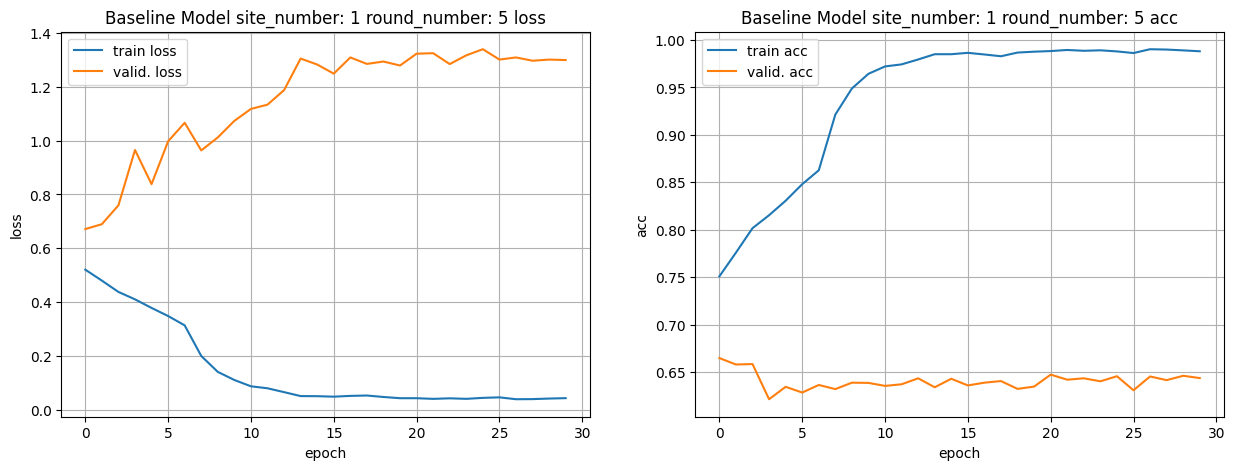


Classification report for test set:
              precision    recall  f1-score   support

         0.0       0.68      0.77      0.72      2333
         1.0       0.67      0.56      0.61      1927

    accuracy                           0.67      4260
   macro avg       0.67      0.66      0.66      4260
weighted avg       0.67      0.67      0.67      4260

2022-11-18_0h9m46s_local_model_round-5_site-1 saved at ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-5_site-1.pth


Training round_number 5 site_number 2:
train_set size: 13188
valid_set size: 4484
test_set size: 4586
total: 22258

2022-11-18_0h9m46s_local_model_round-4_site-2.pth loaded successfully.
Cuda available: True. Model sent to device: cuda:0.

Epoch 0/29
----------
train Loss: 0.3687 Acc: 0.8505
valid Loss: 0.9181 Acc: 0.6597
9m 8s/epoch

Epoch 1/29
----------
train Loss: 0.2831 Acc: 0.8840
valid Loss: 0.9307 Acc: 0.6412
8m 7s/epoch

Epoch 2/29
----------
train Loss: 0.2496 Acc: 0.89

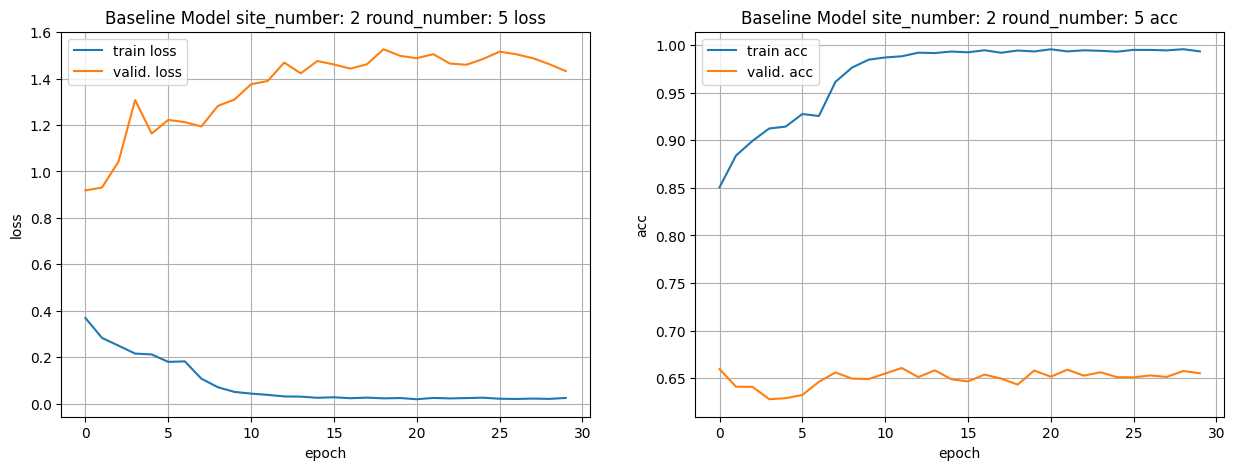


Classification report for test set:
              precision    recall  f1-score   support

         0.0       0.66      0.67      0.67      2436
         1.0       0.62      0.62      0.62      2150

    accuracy                           0.64      4586
   macro avg       0.64      0.64      0.64      4586
weighted avg       0.64      0.64      0.64      4586

2022-11-18_0h9m46s_local_model_round-5_site-2 saved at ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-5_site-2.pth


Training round_number 5 site_number 3:
train_set size: 13589
valid_set size: 4630
test_set size: 4473
total: 22692

2022-11-18_0h9m46s_local_model_round-4_site-3.pth loaded successfully.
Cuda available: True. Model sent to device: cuda:0.

Epoch 0/29
----------
train Loss: 0.4960 Acc: 0.7659
valid Loss: 0.7056 Acc: 0.6283
10m 8s/epoch

Epoch 1/29
----------
train Loss: 0.4520 Acc: 0.7909
valid Loss: 0.7159 Acc: 0.6471
8m 49s/epoch

Epoch 2/29
----------
train Loss: 0.4216 Acc: 0.

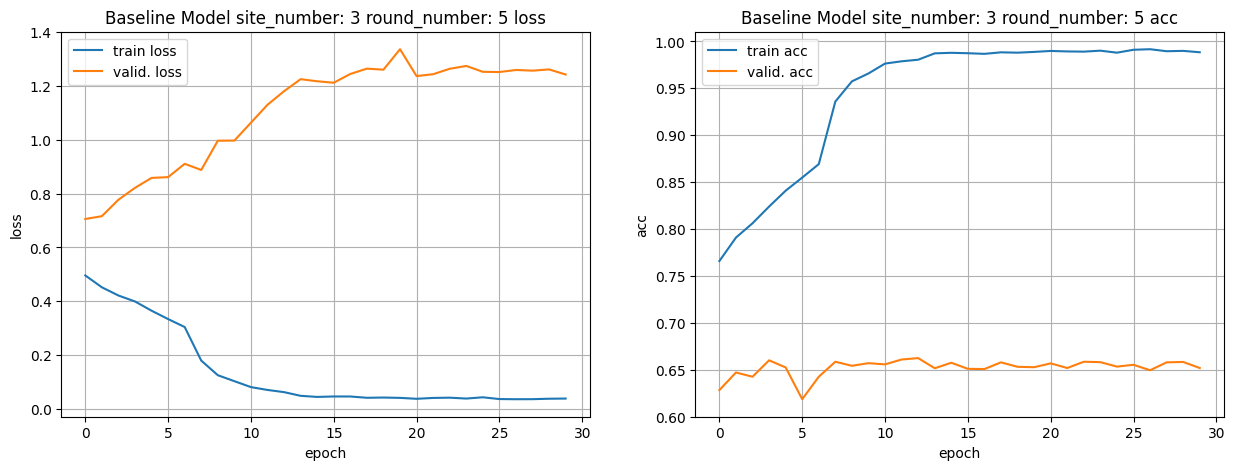


Classification report for test set:
              precision    recall  f1-score   support

         0.0       0.66      0.72      0.69      2381
         1.0       0.65      0.59      0.62      2092

    accuracy                           0.66      4473
   macro avg       0.66      0.65      0.65      4473
weighted avg       0.66      0.66      0.66      4473

2022-11-18_0h9m46s_local_model_round-5_site-3 saved at ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-5_site-3.pth


Training round_number 5 site_number 4:
train_set size: 13764
valid_set size: 4092
test_set size: 4201
total: 22057

2022-11-18_0h9m46s_local_model_round-4_site-4.pth loaded successfully.
Cuda available: True. Model sent to device: cuda:0.

Epoch 0/29
----------
train Loss: 0.3121 Acc: 0.8849
valid Loss: 0.9861 Acc: 0.6178
9m 20s/epoch

Epoch 1/29
----------
train Loss: 0.2149 Acc: 0.9178
valid Loss: 1.0364 Acc: 0.6439
8m 14s/epoch

Epoch 2/29
----------
train Loss: 0.1692 Acc: 0.

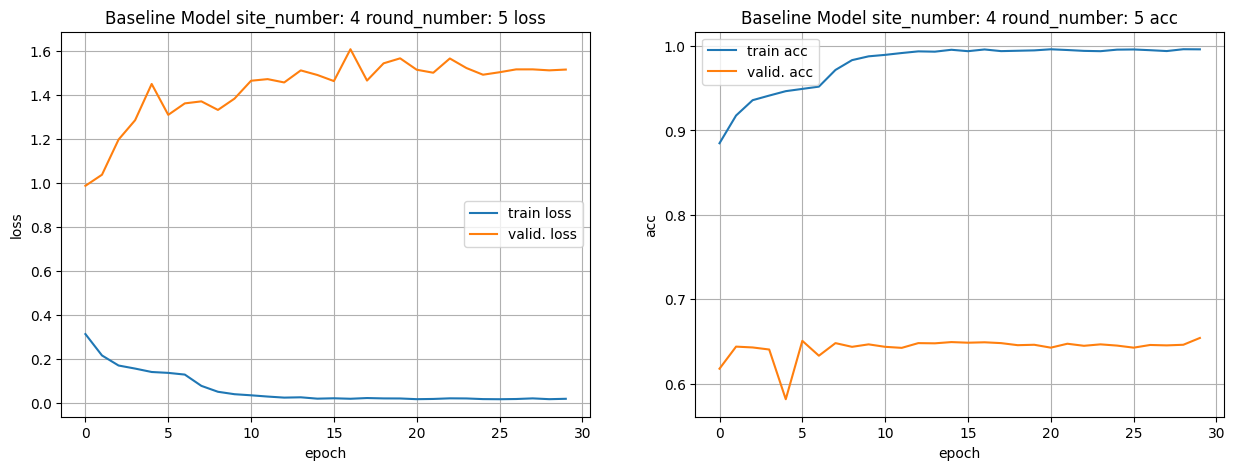


Classification report for test set:
              precision    recall  f1-score   support

         0.0       0.66      0.73      0.69      2214
         1.0       0.66      0.59      0.62      1987

    accuracy                           0.66      4201
   macro avg       0.66      0.66      0.66      4201
weighted avg       0.66      0.66      0.66      4201

2022-11-18_0h9m46s_local_model_round-5_site-4 saved at ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-5_site-4.pth


Training round_number 5 site_number 5:
train_set size: 13679
valid_set size: 4142
test_set size: 4998
total: 22819

2022-11-18_0h9m46s_local_model_round-4_site-5.pth loaded successfully.
Cuda available: True. Model sent to device: cuda:0.

Epoch 0/29
----------
train Loss: 0.3859 Acc: 0.8357
valid Loss: 0.8745 Acc: 0.6461
9m 18s/epoch

Epoch 1/29
----------
train Loss: 0.3125 Acc: 0.8685
valid Loss: 1.0089 Acc: 0.6429
8m 18s/epoch

Epoch 2/29
----------
train Loss: 0.2685 Acc: 0.

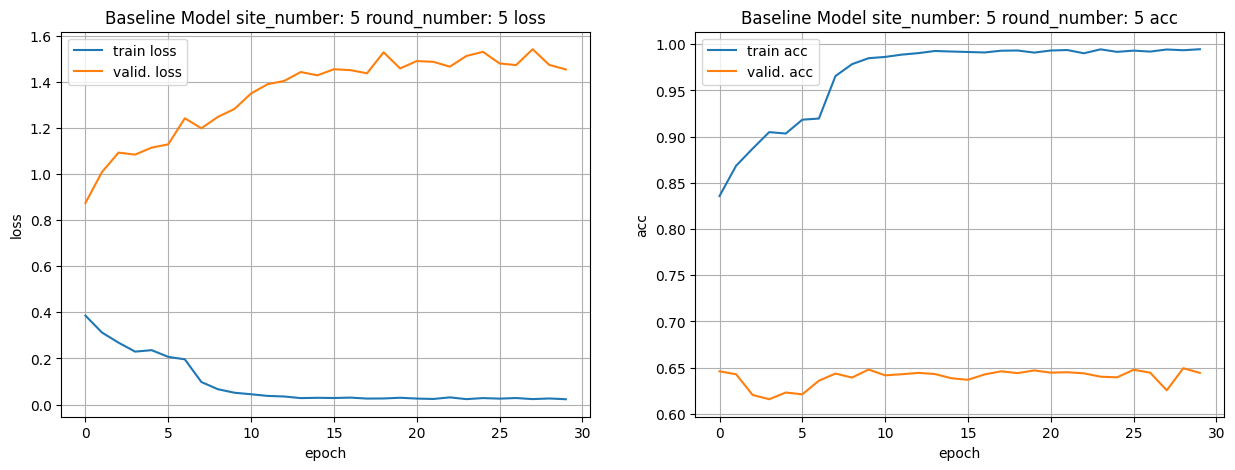


Classification report for test set:
              precision    recall  f1-score   support

         0.0       0.67      0.69      0.68      2647
         1.0       0.64      0.62      0.63      2351

    accuracy                           0.66      4998
   macro avg       0.66      0.66      0.66      4998
weighted avg       0.66      0.66      0.66      4998

2022-11-18_0h9m46s_local_model_round-5_site-5 saved at ../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_local_model_round-5_site-5.pth


In [3]:
exec_time = datetime.now()
exec_id = f'{exec_time.year}-{exec_time.month}-{exec_time.day}_{exec_time.hour}h{exec_time.minute}m{exec_time.second}s'
base_path = os.path.join(base_path, f'{exec_id}/')
if not os.path.isdir(base_path):
    os.mkdir(base_path)
    print(base_path, 'folder created.')

model_predictions = []
# round_number_list = [1,2]
# site_number_list = [1,2]
round_number_list = [1,2,3,4,5]
site_number_list = [1,2,3,4,5]
for round_number in round_number_list:
    for site_number in site_number_list:

        print(f'\n\nTraining round_number {round_number} site_number {site_number}:')
        model_id = f'local_model_round-{round_number}_site-{site_number}'
        model_id_old = f'local_model_round-{round_number-1}_site-{site_number}'
        model_name = f'{exec_id}_{model_id}'
        model_name_old = f'{exec_id}_{model_id_old}'
        
        df = load_dataset(site_number)
        dataloaders, db_sizes = get_dataloaders(df, round_number, test_all_rounds=True)

        ### Visualize a few images
        # Let's visualize a few training images so as to understand the data augmentations.
        # vis.plot_samples(dataloaders['train'], title=f'site_number {site_number} round_number {round_number} samples')        
        
        # Train the model
        model = get_model(model_name=model_name_old, base_path=base_path)
        model, model_hist = set_and_train_model(model, dataloaders, num_epochs=num_epochs)
        vis.plot_model_hist(model_hist, f'Baseline Model site_number: {site_number} round_number: {round_number}')
        
        # Evaluate model predictions
        predictions = evaluate_model(model, dataloaders, split='test')
        predictions['round_number'] = round_number; predictions['site_number'] = site_number
        model_predictions.append(predictions)
        # Saving current model:
        save_model(model, model_name, base_path=base_path)

In [4]:
# Saving predictions report:
json_filepath = f'{base_path}{exec_id}_predictions.json'
with open(json_filepath, 'w') as outfile:
    json.dump(model_predictions, outfile)

In [5]:
with open(json_filepath) as json_file:
    data = json.load(json_file)
model_predictions_ = pd.DataFrame(data)
model_predictions_

,y_pred,y_true,round_number,site_number
0,"[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...",1,1
1,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...","[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",1,2
2,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",1,3
3,"[1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...",1,4
4,"[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1,5
5,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...",2,1
6,"[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...","[1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",2,2
7,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",2,3
8,"[1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...",2,4
9,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,5
